# Using APIs to Get Data From the Internet


**API** means Application Programmer Interface

An API is a set of instructions that describe how computers can interact with each other to request and receive information.

Some important questions we will ask that help us discover APIs is below.

|Question | In technical terms |
|:---------|:--------------------|
|Where is my data? | What is the domain? |
|How do I learn what data is available?| Where is the documentation? |
|How do I request specific data?| How do I formulate a URL for a specific purpose? |
|How do I interpret the data?| What is the structure and format of the output?|



**Let's walk through an example in the browser**

PlaceKitten!

In a browser, go to http://www.placekitten.com

|In technical terms | PlaceKitten |
|:---------|:--------------------|
|What is the domain? | http://www.placekitten.com |
|Where is the documentation?| The documentation is on the home page. |
|How do I formulate a URL for a specific purpose? | You put it in the url like http://www.placekitten/width/height |
|What is the structure and format of the output?| It's an image! |

# Accessing placekitten in python

We're going to use a special library called <code>requests</code>

In [1]:
from IPython.display import display, Image  # This line lets you display images. We'll use that in a bit.

# This line lets you use python to download data from the web.
import requests

In [2]:
# Get a 200 by 300 image from placekitten.
r = requests.get('http://www.placekitten.com/200/300')

In [3]:
# Look at the status code
r.status_code

200

In [4]:
# print the content
r.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 65\n\xff\xdb\x00C\x00\x0b\x08\x08\n\x08\x07\x0b\n\t\n\r\x0c\x0b\r\x11\x1c\x12\x11\x0f\x0f\x11"\x19\x1a\x14\x1c)$+*($\'\'-2@7-0=0\'\'8L9=CEHIH+6OUNFT@GHE\xff\xdb\x00C\x01\x0c\r\r\x11\x0f\x11!\x12\x12!E.\'.EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE\xff\xc0\x00\x11\x08\x01,\x00\xc8\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc

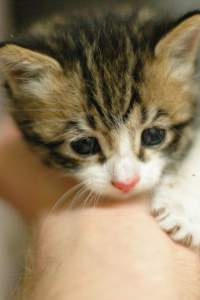

In [5]:
# Use the Image function to display the image
display(Image(r.content))

### Exercise 1

Write a function that takes in the width and height and prints an image

### Exercise 2

Can you write a loop to show several images?


In [6]:
# Write a loop that shows multiple images


# Example 2: Getting World Times

This example introduces a slightly more complicated API. It also introduces **JSON** which is a very common data format.

The API (including some documentation) is at http://worldtimeapi.org/

In [7]:
# Download list of time zones
r = requests.get("http://worldtimeapi.org/api/timezone")
print(r.content)

b'["Africa/Abidjan","Africa/Accra","Africa/Algiers","Africa/Bissau","Africa/Cairo","Africa/Casablanca","Africa/Ceuta","Africa/El_Aaiun","Africa/Johannesburg","Africa/Juba","Africa/Khartoum","Africa/Lagos","Africa/Maputo","Africa/Monrovia","Africa/Nairobi","Africa/Ndjamena","Africa/Sao_Tome","Africa/Tripoli","Africa/Tunis","Africa/Windhoek","America/Adak","America/Anchorage","America/Araguaina","America/Argentina/Buenos_Aires","America/Argentina/Catamarca","America/Argentina/Cordoba","America/Argentina/Jujuy","America/Argentina/La_Rioja","America/Argentina/Mendoza","America/Argentina/Rio_Gallegos","America/Argentina/Salta","America/Argentina/San_Juan","America/Argentina/San_Luis","America/Argentina/Tucuman","America/Argentina/Ushuaia","America/Asuncion","America/Atikokan","America/Bahia","America/Bahia_Banderas","America/Barbados","America/Belem","America/Belize","America/Blanc-Sablon","America/Boa_Vista","America/Bogota","America/Boise","America/Cambridge_Bay","America/Campo_Grande","A

### Exercise 3

Use the .json() function to get the response converted to a dictionary or list

In [8]:
# Use the .json() function to get the response converted to a dictionary or list
# What did it return?


### Exercise 4

Get the time for your time zone

In [9]:
# Your code here


### Exercise 5

Get the time for your IP address

In [10]:
# Get the time for your IP address


# Example 3: Getting Wikipedia pages

Wikipedia also has an open API, and I want to use it to show one other tip for using the `requests` library; many APIs will take in a set of parameters, which you can pass as a parameter dictionary.

The documentation for the very extensive API is [here](https://www.mediawiki.org/wiki/API:Main_page). Many of the operations require you to authenticate (which we will cover next), but some things, like getting the content of a page, do not.

For example, the following code gets the recent changes to Wikipedia.

In [11]:
import requests

endpt = 'https://en.wikipedia.org/w/api.php'


def get_last_pages_changed(n):
    params = {'action': 'query',
          'format': 'json',
          'list': 'recentchanges',
          'rcnamespace': '0',
          'rclimit': n}
    r = requests.get(endpt, params=params)
    #print(r.json())
    #print(r.json()['query']['recentchanges'])
    result = []
    content = r.json()['query']['recentchanges']
    for page in content:
        result.append(page['title'])
    return result

In [12]:
get_last_pages_changed(20)

['List of Intel graphics processing units',
 'Vidadala Rajini',
 'Amfilochia',
 'Malavika Sreenath',
 'Nord-Ouest (department)',
 '2022–23 Egyptian Premier League',
 'Alexander Mackenzie (explorer)',
 'Anton Donchev',
 'New Horizon Mall',
 'Chorlton High School',
 'Second Bull Run Confederate order of battle',
 'Lei Uk Tsuen (Sha Tin District)',
 'Yuri',
 "Donald Trump photo op at St. John's Church",
 'Amitav Ghosh',
 'Business valuation standard',
 '1958 Cotton Bowl Classic',
 'Anton Donchev',
 'Blackamoor (decorative arts)',
 'State Anthem of the Soviet Union']

## Exercise 6

Review the documentation (and Google) to see if you can figure out how to get a list of all of the users who have ever edited the most recently edited Wikipedia page.

In [13]:
## Your code here

# Example 4: Intro to Twitter API

In order to use the Twitter API, you need to do two things:

1. Install tweepy. This is a python library designed to make it easier to use the API (rather than using `requests` directly. I made [this video](https://www.youtube.com/watch?v=TASX3evcgG4) to walk you through how to install tweepy in Anaconda.

2. To use the Twitter API, you need to be authenticated, and so you need a developer account. [This page](https://wiki.communitydata.science/Intro_to_Programming_and_Data_Science_(Summer_2020)/Twitter_authentication_setup) explains how to get a developer account.

Once you have your keys, you should create a file called `twitter_authentication.py` in the same directory as this file. It should contain the following four lines (replace the fake strings below with the corresponding keys from your twitter account):

```
CONSUMER_KEY = 'zFxMGdKmbo4e72X8Fi2FYr54v'
CONSUMER_SECRET = 'SetuIC9x6zPQXPZrc9cKTph7AMSngUZSf745GXT0QZTrnWeELQ'
ACCESS_TOKEN = '16614440-V09URsqNfP0V0JYZCD65NhpJAcPZ6Wb9A5ar9JrUT'
ACCESS_TOKEN_SECRET = 'oxVSzC1OjXOVVYrBvGyy6XKKe772Jdvvw6Opb3bSLdIb'
```

Note that the consumer key and consumer secret are called API key and API secret in the new Twitter interface.

In general, it is a good practice to keep your keys (which should be secret) separate from your code, which you can share. In this case, we put them in a different file and then import them.

The following code loads the tweepy library and imports these keys from the `twitter_authentication.py` file, and then prepares to "log in" to your account for the Twitter API.

In [14]:
import tweepy

from twitter_authentication import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# We then create an api object, based on the auth object created with your credentials
api = tweepy.API(auth, wait_on_rate_limit=True)

ModuleNotFoundError: ignored

## Rate Limiting

You will quickly learn that the Twitter API is "rate limited". This means that they will only let each account make a certain number of calls to their API in a given time period. The default rate is quite low - many calls only allow 15 calls per 15 minutes.

You may notice above that we had the code:
```
api = tweepy.API(auth, wait_on_rate_limit=True)
```
the `wait_on_rate_limit=True` tells your code to wait for 15 minutes if it gets back a message that you've exceeded a rate limit. This can get annoying when debugging, so be careful with how often you try things - sometimes it makes sense, for example, to try to get a small amount of data that only takes one call and make sure that your code works before trying to get all of the data.

## Timeline

This first example is just to make sure it's working. It should print out the last 100 tweets from your timeline.

In [ ]:
# Grab the last 100 tweets
public_tweets = api.home_timeline(count=100)

# And print the text from them
for tweet in public_tweets:
    print(tweet.text)


Each of these `tweet` objects contains lots of additional information. This shows all of the metadata available for the last one we looked at.

In [ ]:
tweet._json

You can try to change the `count` argument above, and you'll quickly learn that if you raise it over 200, you will still only get 200 tweets. If you want to print more than 200 tweets, you may need to use a [cursor](http://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html).

This is basically tweepy's clever way of breaking what you want to do into multiple calls to the API.

For example, this call will get 350 tweets. The `count` argument (optional) says how many tweets to get per call, and the argument in `.items()` is how many to get in total.

In [ ]:
for tweet in tweepy.Cursor(api.home_timeline, count = 175).items(350):
    print(tweet.text)

## Followers

You can also get information about a user, such as who their followers are.

Here's information about me and some of my followers.

In [ ]:
user = api.get_user(screen_name = 'jdfoote')

print(user.screen_name + " has " + str(user.followers_count) + " followers.")

print("They include these 100 people:")

for follower in user.followers(count=100):
    print(follower.screen_name)

Here is what that user object looks like for my user

In [ ]:
user._json

And here's the user object for one of my followers, which is nearly identical.

In [ ]:
follower._json

Note that 200 is the maximum number of followers that you can get at one time. If you want to get information about all of a user's followers, you will need to use a cursor. If you are getting many followers, you will almost certainly hit rate limits.

In [ ]:
f = []
for follower in tweepy.Cursor(api.get_followers, screen_name='jdfoote', count=200).items():
    #print(follower.screen_name)
    f.append(follower.screen_name)

In [ ]:
print(f)

## Searching

For most of your research, you may be interested in how people are talking about a given topic. There are two main ways to do this.

The first is the search API ([Official Twitter info on the Search API](https://developer.twitter.com/en/docs/tweets/search/overview)). We only have access to "[Standard Search](https://developer.twitter.com/en/docs/tweets/search/overview/standard)", the most limited of Twitter Search API options, which is limited to the last 7 days.


**Note that if you would like to use Twitter for a project or a paper, you can request access to the Academic Research API, which includes historical search and a much higher limit on the number of tweets you can request**

Unforutnately, tweepy doesn't yet support the v2 API for Twitter, but [here is an example of how to use it](https://github.com/twitterdev/Twitter-API-v2-sample-code/blob/master/Full-Archive-Search/full-archive-search.py) with just requests.


[This page](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets) is the documentation for Standard Search and has some helpful intel about modifying the parameters.

Below is a simple example that gets the last 20 tweets about data science.

In [ ]:
public_tweets = api.search_tweets('"from:@jdfoote"', count=20)

for tweet in public_tweets:
    print(tweet.user.screen_name + "\t" + str(tweet.created_at) + "\t" + tweet.text)

Note that many of these results are truncated. If you want the full tweet, you actually have to modify the call a little bit, like so.

In [ ]:
public_tweets = api.search_tweets('"data science"', count=20, tweet_mode='extended')

for tweet in public_tweets:
    print(tweet.user.screen_name + "\t" + str(tweet.created_at) + "\t" + tweet.full_text)

### Additional Search resources

* [Tweepy extended tweets documentation](http://docs.tweepy.org/en/latest/extended_tweets.html)
* [Twitter documentation for crafting queries](https://developer.twitter.com/en/docs/tweets/search/guides/standard-operators). This includes things like how to search by geography or remove retweets.

## Streaming

The other option is to "stream" tweets. Instead of looking backward, this just keeps you connected to Twitter and whenever new tweets come in, they are sent to your program. You would typicaly just keep the program running and keep writing the data that you want to an external file.

As with the search API, there are some caveats. One is that (I believe) there is no guarantee that this is all of the tweets that match. If you try to filter by very popular terms, then Twitter may give you only a sample of them.

In [ ]:
class Streamer(tweepy.Stream):
    def on_status(self, tweet):
        print(tweet.author.screen_name + "\t" + tweet.text)

    def on_error(self, status_code):
        print( 'Error: ' + repr(status_code))
        return False

streamer = Streamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

keywords = ['Purdue', '"data science"']
streamer.filter(track = keywords)

# Exercises


7. Use the streaming API to produce a list of 1000 tweets about a topic.
2. From that list of 1000 tweets, eliminate retweets.
4. For each original tweet, create a dictionary with the number of times you see it retweeted in your dataset.
5. Get a list of the URLs in your dataset
3. Now, see if you can figure out how to eliminate retweets in the query instead.
7. Get the last 50 tweets from West Lafayette, using the search API. (Hint - look up the geocode information [here](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets)).
8. Alter the streaming algorithm to include a "locations" filter to get tweets from New York City. You need to use the order sw_lng, sw_lat, ne_lng, ne_lat for the four coordinates instead of a radius as in the search API.

### BONUS Questions
1. For each of your followers, get *their* followers (investigate time.sleep to throttle your computation)
2. Identify the follower you have that also follows the most of your followers.
3. How many users follow you but none of your followers?